In [1]:
#Social_Network_Ads.csv

**Importing the libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score

from sklearn.metrics import accuracy_score, plot_roc_curve, roc_auc_score, f1_score

**Importing the dataset**

In [3]:
data = pd.read_csv('/content/Social_Network_Ads.csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
data = data.drop(['User ID'], axis= 1)
data

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [5]:
data.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [7]:
data['Gender'] = data['Gender'].replace({'Male': 0, 'Female': 1})
data

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
...,...,...,...,...
395,1,46,41000,1
396,0,51,23000,1
397,1,50,20000,1
398,0,36,33000,0


**Splitting the dataset into the Training set and Test set**

In [8]:
X = data.iloc[: , :-1]
Y = data.iloc[:, -1]
#X
#Y

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.3, random_state= 0)

**Feature Scaling**

In [10]:
scaler = StandardScaler()

scaler.fit(X_train, Y_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**Fitting Random Forest to the Training set**

In [11]:
best_depth= 0
best_cross_score= 0
for depth in [1,2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,90]:

  rf = RandomForestClassifier(n_estimators=10, max_depth=depth)
  
  # Fit dt to the training set
  rf.fit(X_train, Y_train) # the model is trained
  trainAccuracy = accuracy_score(Y_train, rf.predict(X_train)) # this is useless information - i am showing to prove a point
  
  rf = RandomForestClassifier(n_estimators=10, max_depth=depth) # a fresh model which is not trained yet
  valAccuracy = np.mean(cross_val_score(rf, X_train, Y_train, cv=10)) # syntax : cross_val_Score(freshModel,fts, target, cv= 10/5)
  
  print("Depth  : ", depth, " Training Accuracy : ", trainAccuracy, " Cross val score : " ,valAccuracy)

  if valAccuracy > best_cross_score:
    best_cross_score, best_depth = valAccuracy, depth


Depth  :  1  Training Accuracy :  0.8  Cross val score :  0.7678571428571428
Depth  :  2  Training Accuracy :  0.8714285714285714  Cross val score :  0.8821428571428573
Depth  :  3  Training Accuracy :  0.9178571428571428  Cross val score :  0.8999999999999998
Depth  :  4  Training Accuracy :  0.9214285714285714  Cross val score :  0.8785714285714287
Depth  :  5  Training Accuracy :  0.9464285714285714  Cross val score :  0.8857142857142858
Depth  :  6  Training Accuracy :  0.9642857142857143  Cross val score :  0.8857142857142858
Depth  :  7  Training Accuracy :  0.9678571428571429  Cross val score :  0.8642857142857142
Depth  :  8  Training Accuracy :  0.9714285714285714  Cross val score :  0.8678571428571429
Depth  :  9  Training Accuracy :  0.975  Cross val score :  0.8678571428571427
Depth  :  10  Training Accuracy :  1.0  Cross val score :  0.8714285714285713
Depth  :  15  Training Accuracy :  0.9714285714285714  Cross val score :  0.8571428571428571
Depth  :  20  Training Accura

In [12]:
print("Best depth: ", best_depth)

rf = RandomForestClassifier(n_estimators= 10, max_depth= best_depth)

# Fit dt to the training set
rf.fit(X_train, Y_train) # it will ask all possible questions, compute the information gain and choose the best split

Best depth:  3


RandomForestClassifier(max_depth=3, n_estimators=10)

**Predicting the Test set results**

In [13]:
Y_pred = rf.predict(X_test)

df1= pd.DataFrame({"Actual": Y_test, "Predicted": Y_pred})
df1

,Actual,Predicted
132,0,0
309,0,0
341,0,0
196,0,0
246,0,0
...,...,...
216,0,1
259,1,1
49,0,0
238,0,0


In [14]:
print("F1 Score for this model:",f1_score(Y_test, Y_pred))

F1 Score for this model: 0.8536585365853658


**Making the Confusion Matrix**

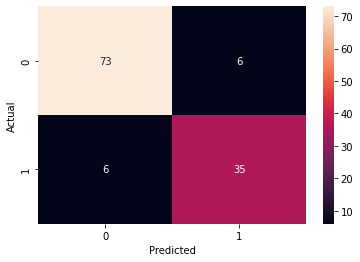

In [15]:
confusion_matrix = pd.crosstab(Y_test, Y_pred, rownames= ['Actual'], colnames= ['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

**Visualising the Training set results**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


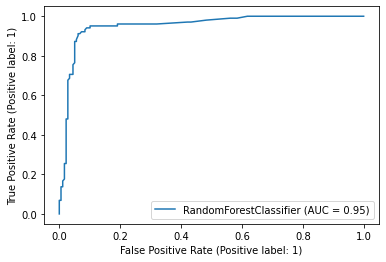

In [16]:
plot_roc_curve(rf, X_train, Y_train)

**Visualising the Test set results**

In [17]:
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = X.columns, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png'); #please check Files section in GoogleColab, present on the left side below Variables

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


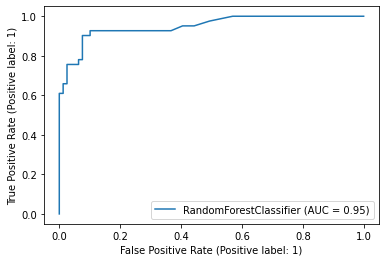

In [18]:
plot_roc_curve(rf, X_test, Y_test)